
# VISUALIZACIÓN NUBE DE PALABRAS 🤠 

<br><b>Creador:</b> Norma Yuliana Cala Martínez
<br><b>Email: </b> normisss11@gmail.com
<br><b>Fecha creacion:</b> Octubre 31, 2020


In [1]:
#!pip install wordcloud

## Instalación de librerías.

In [2]:
import numpy as np
import pandas as pd

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

## Cargar datos

In [3]:
data = pd.read_csv('archivos/hween_clean.csv')
data.head()

,texto,fecha,ciudad,departamento,lat,lon
0,¿Desparchado porque mañana no podrás salir a p...,2020-10-31 00:16:27,Bogotá,Cundinamarca,4.649178,-74.062827
1,Participa en nuestro concurso de disfraces y l...,2020-10-31 00:15:34,Bogotá,Cundinamarca,4.649178,-74.062827
2,MEGA-ESPECIAL Halloween 🎃 (Parte 53). Yo veo u...,2020-10-31 00:13:59,Bogotá,Cundinamarca,4.649178,-74.062827
3,Un mensaje especial para los padres de familia...,2020-10-31 00:11:46,Bogotá,Cundinamarca,4.649178,-74.062827
4,Luna azul con halloween 🤪👻🤔,2020-10-31 00:10:04,Bogotá,Cundinamarca,4.649178,-74.062827


## Visualizar nube de palabras de manera genérica. 

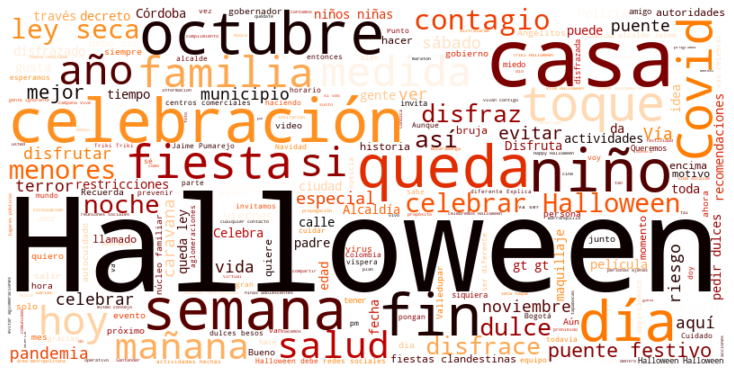

In [4]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.texto.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Cargar imágen.

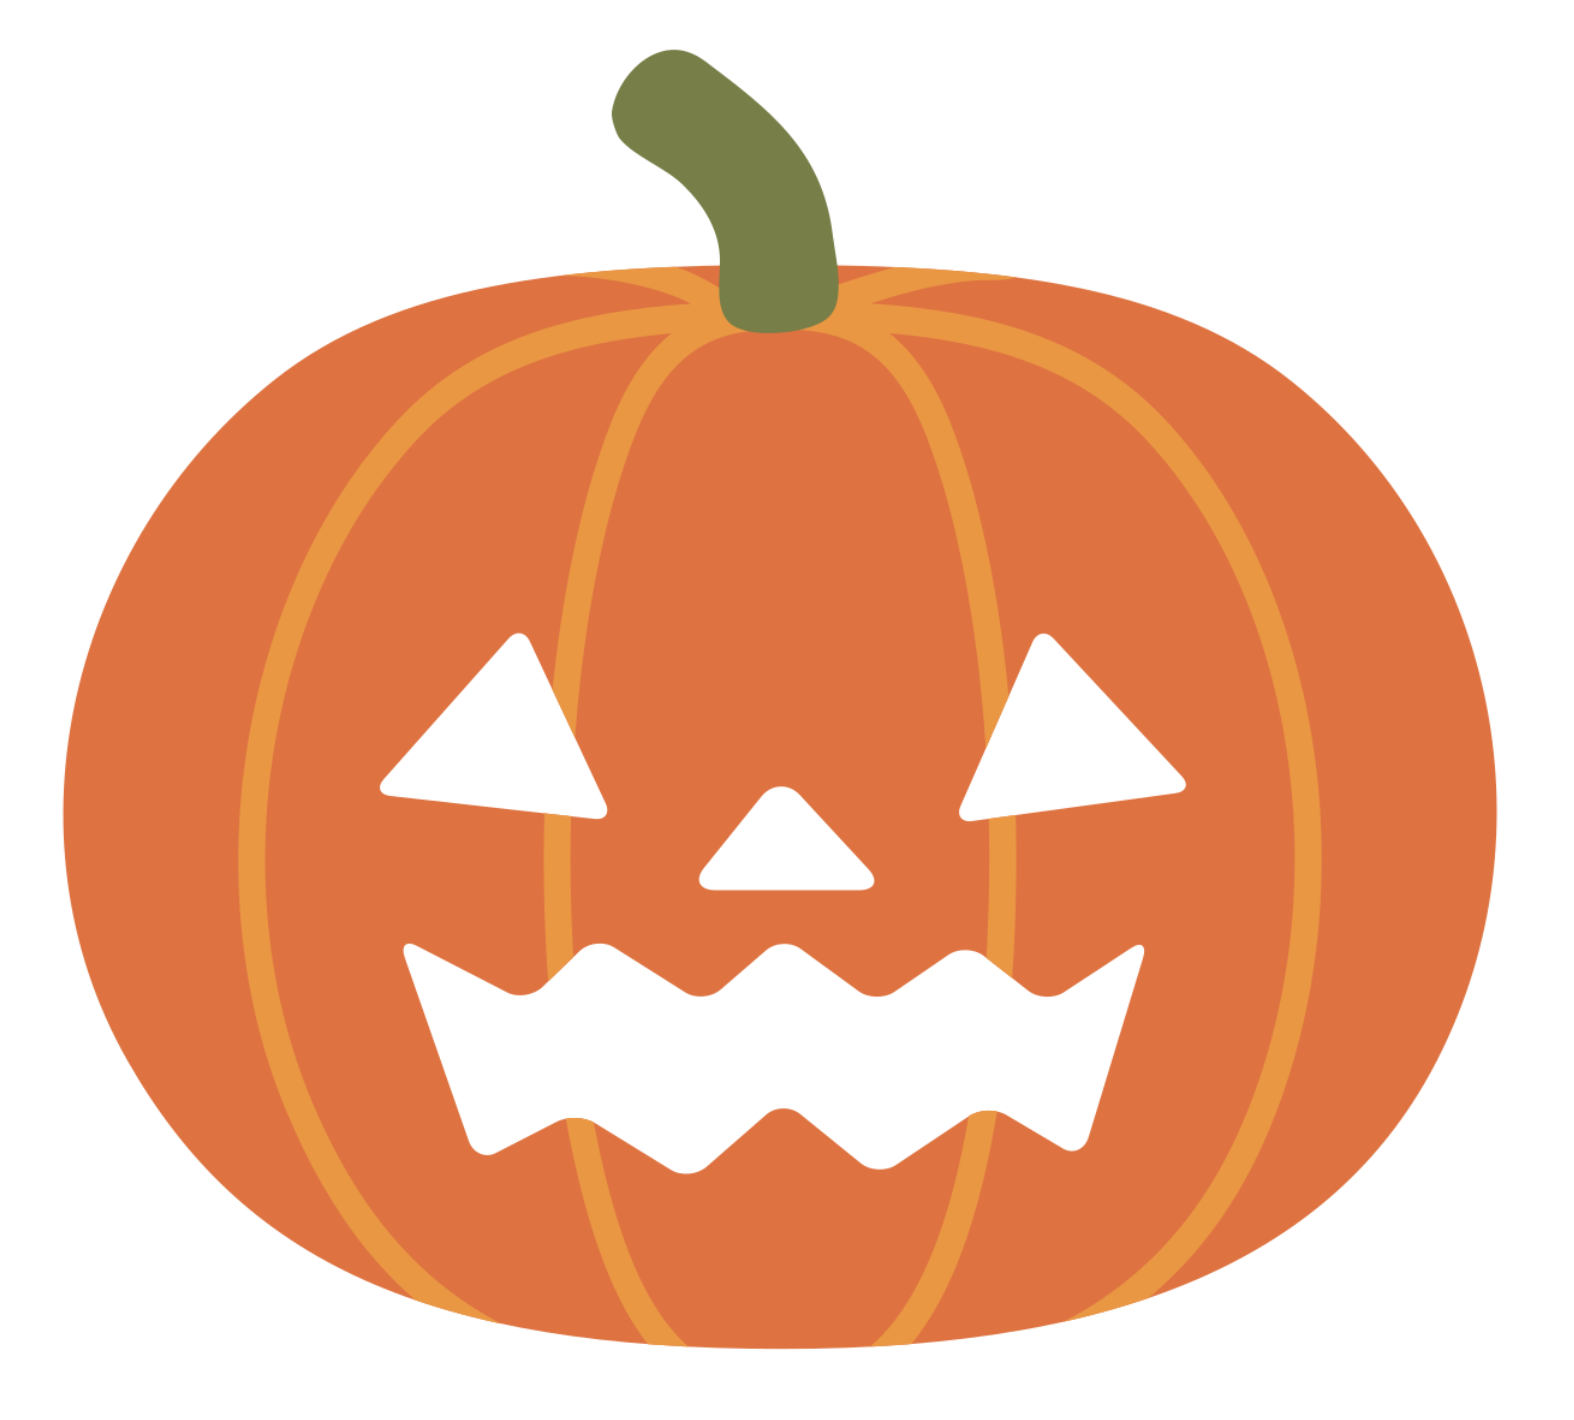

In [40]:
calabaza = PIL.Image.open("archivos/calabaza2.png")
display(calabaza)
mask = np.array(calabaza)

## Acondicionar nube de palabras en la imágen.

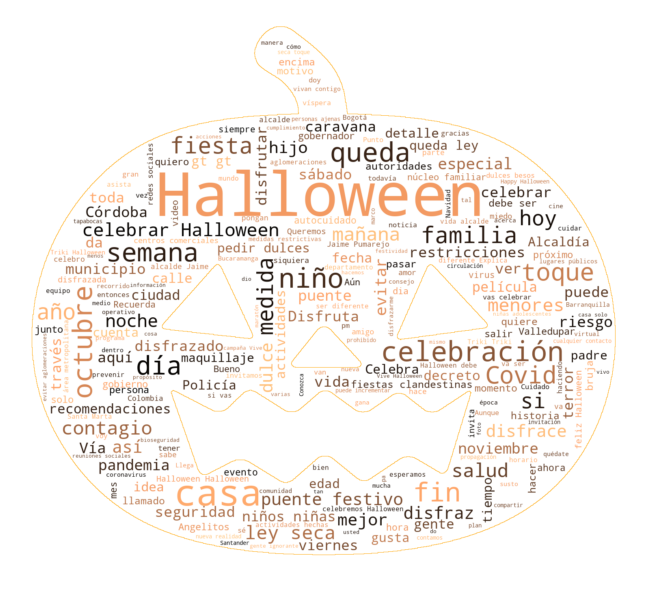

In [7]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.texto.str.cat(sep=' ') 

wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='copper_r',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='orange').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("calabaza.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Sacar plano con algunas columnas para llevar a tableau.

In [13]:
# nube de palabras & mapa de árbol
ciudad1 = 'Barranquilla'
ciudad2 = 'Medellín'

data1 = data[data.ciudad==ciudad1]
data2 = data[data.ciudad==ciudad2]

palabras1 = data1.texto.str.cat(sep=" ")
palabras2 = data2.texto.str.cat(sep=" ")

wordcloud1 = WordCloud(stopwords = stopwords).generate(palabras1).words_
wordcloud2 = WordCloud(stopwords = stopwords).generate(palabras2).words_

temp1 = pd.DataFrame.from_dict(wordcloud1, orient='index').reset_index()
temp1.columns = ['palabra', 'cnt']
temp1['ciudad'] = ciudad1

temp2 = pd.DataFrame.from_dict(wordcloud2, orient='index').reset_index()
temp2.columns = ['palabra', 'cnt']
temp2['ciudad'] = ciudad2

data_nube = pd.concat([temp1, temp2])

# Exporta el plano en la ruta del notebook.
data_nube.to_csv('archivos/nube.csv', index=False)

In [16]:
# mapa
data['contador_palabras'] = data.texto.apply(lambda valor: len(valor.split()))
data[['ciudad', 'lat', 'lon', 'contador_palabras']].to_csv("archivos/mapa.csv")

## Ir a la siguiente ruta y observar el tablero.

https://public.tableau.com/profile/norma3085#!/vizhome/NLP_Tweet_Halloween/TableroTweet

## Cargar Plano para visualizar otra fuente de datos en la nube de palabras.

In [39]:
# Cargar archivo plano.
data = pd.read_csv('archivos/rap_espanol.csv', encoding="utf-8")
data.head()

,id,artista,cancion,album,letra,anyo,visitas
0,0,Denom,Machete (con Jarfaiter y Gente jodida),Medicina,"Para su nuevo disco ""Medicina"", Denom ha vuelt...",2019,126
1,1,Denom,Vacío (con Ivo Incuerdo),Medicina,"[Denom]\nYo que quería, yo que pedía vida,\nSe...",2019,361
2,2,Denom,El orgullo es fiel (con Juancho Marqués y Elio...,Medicina,"""El orgullo es fiel"" es uno de los cortes incl...",2019,262
3,3,Denom,Mueve mueve (con Fernandocosta),Medicina,"[Estribillo: Denom] (x2)\nMueve, mueve, mueve,...",2019,578
4,4,Jaro Desperdizio,Insomnia,"Sin álbum, es un vídeo suelto","[Estribillo]\nY en esta noche, ¿Quién me arrop...",2019,219


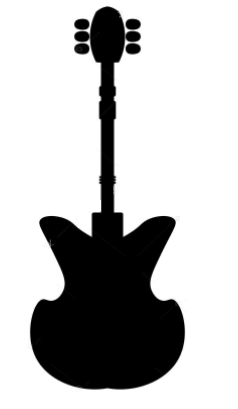

In [59]:
guitarra = PIL.Image.open("archivos/guitarra.png")
display(guitarra)
mask = np.array(guitarra)

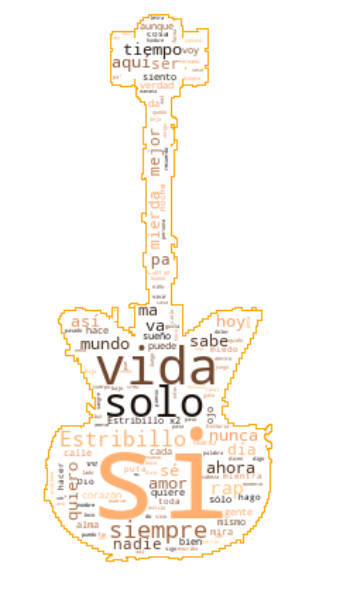

In [64]:
# Más en https://www.datacamp.com/community/tutorials/wordcloud-python
palabras = data.letra.str.cat(sep=' ') 

wordcloud = WordCloud(width=50, height=60,
                     max_font_size=100, max_words=250,
                     background_color='white', colormap='copper_r',
                     stopwords=stopwords,
                     mask=mask, contour_width=0.5, contour_color='orange').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("guitarra_exp.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()